# Summary
The previous owners of the New York Mets of Major League Baseball became embroilled in the Bernie Madoff scandal, losing tens of millions of dollars by being cloase to the top of the pyramid. As a result payroll for the team in one of the sport's biggest markets was affected dramatically for nearly a decade. This study analyzes yearly payroll for the Mets and their competitors during the period of time before and after the scandal broke. A "synthetic" Mets is created to project payroll throughout the 2010's in the absence of the shock (Madoff)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
payroll = pd.read_csv('mlb_payroll.csv')
avg = pd.DataFrame(payroll.groupby('Year').Payroll.mean())
avg.rename(columns={"Payroll":"MeanPayroll"},inplace=True)
payroll = pd.merge(payroll,avg,how='left',on='Year')
payroll['RelativePayroll'] = payroll['Payroll']/payroll['MeanPayroll']-1

In [4]:
payroll

,Year,Team,Payroll,MeanPayroll,RelativePayroll
0,2020,Yankees,246154071,1.308597e+08,0.881053
1,2020,Dodgers,218903167,1.308597e+08,0.672808
2,2020,Astros,206783333,1.308597e+08,0.580191
3,2020,Cubs,185186000,1.308597e+08,0.415149
4,2020,Red Sox,182873928,1.308597e+08,0.397481
...,...,...,...,...,...
685,1998,Reds,20707333,4.107985e+07,-0.495925
686,1998,Tigers,19237500,4.107985e+07,-0.531705
687,1998,Marlins,15141000,4.107985e+07,-0.631425
688,1998,Pirates,13695000,4.107985e+07,-0.666625


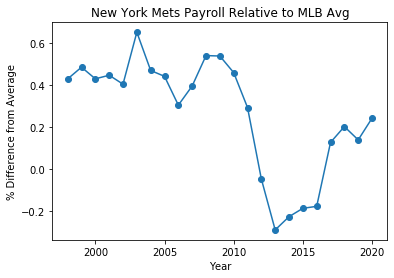

In [165]:
Mets = payroll[payroll['Team']=='Mets']
#Yanks = payroll[payroll['Team']=='Yankees']
plt.plot(Mets.Year,Mets.RelativePayroll,marker='o')
#plt.plot(Yanks.Year,Yanks.RelativePayroll,marker='o')

plt.title("New York Mets Payroll Relative to MLB Avg")
plt.xlabel('Year')
plt.ylabel('% Difference from Average')
plt.show()

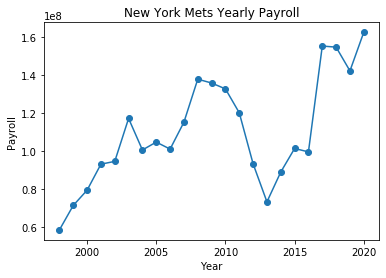

In [156]:
Mets = payroll[payroll['Team']=='Mets']
plt.plot(Mets.Year,Mets.Payroll,marker='o')
plt.title("New York Mets Yearly Payroll")
plt.xlabel('Year')
plt.ylabel('Payroll')
plt.show()

### Numpy SCM Absolute Payroll

In [97]:
Mets_pre_madoff = Mets[Mets.Year <=2008]

Mets_pre_payroll = Mets_pre_madoff.Payroll.to_numpy()
Mets_pre_payroll = np.reshape(Mets_pre_payroll,(Mets_pre_payroll.size,1))

league_pre_madoff = payroll[(payroll.Team!='Mets') & (payroll.Year <=2008)]
league_post_madoff = payroll[(payroll.Team!='Mets') & (payroll.Year >2008)]


In [131]:
#League Pre-Madoff
Y = league_pre_madoff[league_pre_madoff.Year==1998].sort_values(by=['Team']).Payroll.to_numpy()
Y = np.reshape(Y,(1,Y.size))

for yr in range(1999,2009):
    temp = league_pre_madoff[league_pre_madoff.Year==yr].sort_values(by=['Team']).Payroll.to_numpy()
    temp = np.reshape(temp,(1,temp.size))
    Y = np.append(Y,temp,0)
    
#League Post-Madoff    
Y_post = league_post_madoff[league_post_madoff.Year==2009].sort_values(by=['Team']).Payroll.to_numpy()
Y_post = np.reshape(Y_post,(1,Y_post.size))
for yr in range(2010,2021):
    temp = league_post_madoff[league_post_madoff.Year==yr].sort_values(by=['Team']).Payroll.to_numpy()
    temp = np.reshape(temp,(1,temp.size))
    Y_post = np.append(Y_post,temp,0)
    
weights = np.linalg.lstsq(Y,Mets_pre_payroll,rcond=None)[0]
weights.shape    

In [149]:
synthetic_mets_pre = Y.dot(weights)
synthetic_mets_post = Y_post.dot(weights)
synthetic_mets_array = np.append(synthetic_mets_pre,synthetic_mets_post)
synthetic_mets = pd.DataFrame({'Year': Mets.Year[::-1], 'Payroll': synthetic_mets_array})

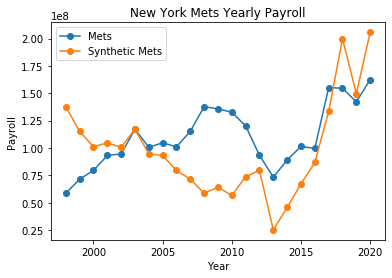

In [157]:
plt.plot(Mets.Year,Mets.Payroll,marker='o', label='Mets')
plt.plot(synthetic_mets.Year,synthetic_mets.Payroll,marker='o', label='Synthetic Mets')
plt.title("New York Mets Yearly Payroll")
plt.xlabel('Year')
plt.ylabel('Payroll')
plt.legend()
plt.show()

### Numpy for SCM Relative Spending (Linear Regression)

In [199]:
Mets_pre_madoff = Mets[Mets.Year <=2008]
Mets_pre_payroll = Mets_pre_madoff.RelativePayroll.to_numpy()
Mets_pre_payroll = np.reshape(Mets_pre_payroll,(Mets_pre_payroll.size,1))


league_pre_madoff = payroll[(payroll.Team!='Mets') & (payroll.Year <=2008)]
league_post_madoff = payroll[(payroll.Team!='Mets') & (payroll.Year >2008)]



In [236]:
Y = league_pre_madoff[league_pre_madoff.Year==1998].sort_values(by=['Team']).RelativePayroll.to_numpy()
Y = np.reshape(Y,(1,Y.size))
for yr in range(1999,2009):
    temp = league_pre_madoff[league_pre_madoff.Year==yr].sort_values(by=['Team']).RelativePayroll.to_numpy()
    temp = np.reshape(temp,(1,temp.size))
    Y = np.append(Y,temp,0)
    
Y_post = league_post_madoff[league_post_madoff.Year==2009].sort_values(by=['Team']).RelativePayroll.to_numpy()
Y_post = np.reshape(Y_post,(1,Y_post.size))
for yr in range(2010,2021):
    temp = league_post_madoff[league_post_madoff.Year==yr].sort_values(by=['Team']).RelativePayroll.to_numpy()
    temp = np.reshape(temp,(1,temp.size))
    Y_post = np.append(Y_post,temp,0)
    
weights_reg = np.linalg.lstsq(Y,Mets_pre_payroll,rcond=None)[0]
weights_reg  


array([-0.0465764 , -0.06363871, -0.12540062, -0.07609961,  0.12324872,
       -0.04978346,  0.10164297, -0.00399354, -0.12775719,  0.17334539,
       -0.04890538,  0.04519263, -0.07063259,  0.1540284 , -0.03915221,
        0.07565017, -0.07059823, -0.06100441, -0.00358622,  0.17013334,
       -0.25973263, -0.052309  , -0.0487712 , -0.03572011,  0.0099981 ,
        0.02516969,  0.01146854,  0.0126854 ,  0.06668806])

In [234]:
synthetic_mets_pre = Y.dot(weights_reg)
synthetic_mets_post = Y_post.dot(weights_reg)
synthetic_mets_array = np.append(synthetic_mets_pre,synthetic_mets_post)
synthetic_mets = pd.DataFrame({'Year': Mets.Year[::-1], 'Payroll': synthetic_mets_array})

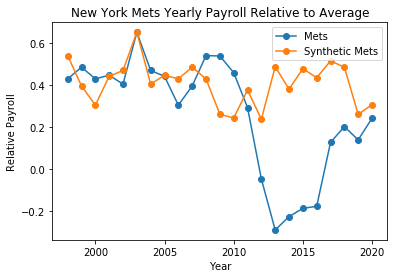

In [235]:
plt.plot(Mets.Year,Mets.RelativePayroll,marker='o', label='Mets')
plt.plot(synthetic_mets.Year,synthetic_mets.Payroll,marker='o', label='Synthetic Mets')
plt.title("New York Mets Yearly Payroll Relative to Average")
plt.xlabel('Year')
plt.ylabel('Relative Payroll')
plt.legend()
plt.show()

### Scipy SCM with constraint (non-negative least squares) 

In [201]:
weights = np.linalg.lstsq(Y,Mets_pre_payroll,rcond=None)[0]
weights.shape  

synthetic_mets_pre = Y.dot(weights)
synthetic_mets_post = Y_post.dot(weights)
synthetic_mets_array = np.append(synthetic_mets_pre,synthetic_mets_post)
synthetic_mets = pd.DataFrame({'Year': Mets.Year[::-1], 'Payroll': synthetic_mets_array})

In [203]:
import scipy.optimize

Mets_pre_payroll = Mets_pre_madoff.RelativePayroll.to_numpy()
weights = scipy.optimize.nnls(Y,Mets_pre_payroll)[0]
weights = weights/np.linalg.norm(weights)

In [204]:
synthetic_mets_pre = Y.dot(weights)
synthetic_mets_post = Y_post.dot(weights)
synthetic_mets_array = np.append(synthetic_mets_pre,synthetic_mets_post)
synthetic_mets = pd.DataFrame({'Year': Mets.Year[::-1], 'Payroll': synthetic_mets_array})

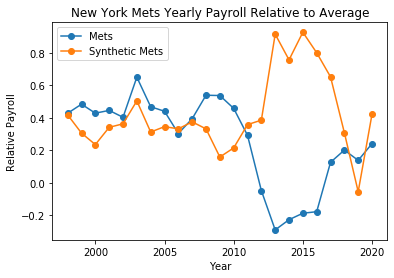

In [205]:
plt.plot(Mets.Year,Mets.RelativePayroll,marker='o', label='Mets')
plt.plot(synthetic_mets.Year,synthetic_mets.Payroll,marker='o', label='Synthetic Mets')
plt.title("New York Mets Yearly Payroll Relative to Average")
plt.xlabel('Year')
plt.ylabel('Relative Payroll')
plt.legend()
plt.show()

### Synthetic Control - Coefficients non-negative and sum to 1.

In [247]:
import scipy.optimize

# Add constraint that weights sum to 1.
Y_constrained = np.append(Y,np.zeros(shape=(1,29))+1,0)
Mets_constrained = Mets_pre_payroll
Mets_constrained = np.append(Mets_constrained,[1])

In [248]:
# Non-negative least squares - constrained
weights = scipy.optimize.nnls(Y_constrained,Mets_constrained)[0]

# Use original matrices to push synthetic Mets forward
synthetic_mets_pre = Y.dot(weights)
synthetic_mets_post = Y_post.dot(weights)
synthetic_mets_array = np.append(synthetic_mets_pre,synthetic_mets_post)
synthetic_mets = pd.DataFrame({'Year': Mets.Year[::-1], 'Payroll': synthetic_mets_array})


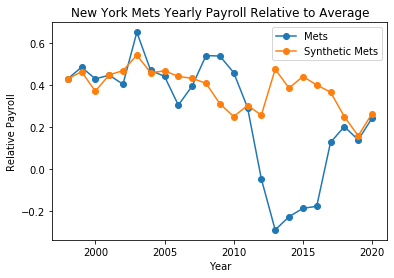

In [249]:
plt.plot(Mets.Year,Mets.RelativePayroll,marker='o', label='Mets')
plt.plot(synthetic_mets.Year,synthetic_mets.Payroll,marker='o', label='Synthetic Mets')
plt.title("New York Mets Yearly Payroll Relative to Average")
plt.xlabel('Year')
plt.ylabel('Relative Payroll')
plt.legend()
plt.show()

### Bayesian Linear Regression - MCMC out of the box

In [302]:
league_pre_madoff = payroll[(payroll.Team!='Mets') & (payroll.Year <=2008)]
league_pre_madoff

,Year,Team,Payroll,MeanPayroll,RelativePayroll
360,2008,Yankees,209081577,8.954778e+07,1.334860
362,2008,Tigers,137685196,8.954778e+07,0.537561
363,2008,Red Sox,133390035,8.954778e+07,0.489596
364,2008,White Sox,121189332,8.954778e+07,0.353348
365,2008,Angels,119216333,8.954778e+07,0.331315
...,...,...,...,...,...
685,1998,Reds,20707333,4.107985e+07,-0.495925
686,1998,Tigers,19237500,4.107985e+07,-0.531705
687,1998,Marlins,15141000,4.107985e+07,-0.631425
688,1998,Pirates,13695000,4.107985e+07,-0.666625


In [445]:
league = pd.DataFrame(columns = ['Year'])
for team in payroll.Team.unique():
    new = payroll[payroll.Team == team][['Year','RelativePayroll']]
    league = league.merge(new.rename(columns = {"RelativePayroll": team}), on='Year', how = 'outer')

league = league.sort_values(by='Year')
league = league.set_index('Year')


In [447]:
league.rename(columns = {"Blue Jays":"BlueJays", "Red Sox": "RedSox", "White Sox":"WhiteSox", "Expos/Nats":"Nationals"}, inplace=True)


In [350]:
mets_98_08 = pre_madoff[['Mets']]
league_98_08 = pre_madoff.drop(['Mets'],axis=1)

In [351]:
formula = 'Mets ~ ' + ' + '.join(['%s' % variable for variable in league_98_08.columns])
formula

'Mets ~ Yankees + Dodgers + Astros + Cubs + RedSox + Phillies + Angels + Cardinals + Nationals + Braves + Giants + Rockies + Padres + Rangers + Reds + Twins + WhiteSox + Diamondbacks + BlueJays + Tigers + Brewers + Mariners + Athletics + Indians + Royals + Rays + Pirates + Marlins + Orioles'

In [361]:
# Context for the model
with pm.Model() as regression_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = pre_madoff, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    regression_trace = pm.sample(draws=8000, chains = 2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Orioles, Marlins, Pirates, Rays, Royals, Indians, Athletics, Mariners, Brewers, Tigers, BlueJays, Diamondbacks, WhiteSox, Twins, Reds, Rangers, Padres, Rockies, Giants, Braves, Nationals, Cardinals, Angels, Phillies, RedSox, Cubs, Astros, Dodgers, Yankees, Intercept]
Sampling 2 chains, 6,784 divergences: 100%|██████████| 18000/18000 [1:08:55<00:00,  4.35draws/s]
There were 1639 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5144 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3101061401002865, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [357]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib

plot_trace(regression_trace)



Wall time: 0 ns


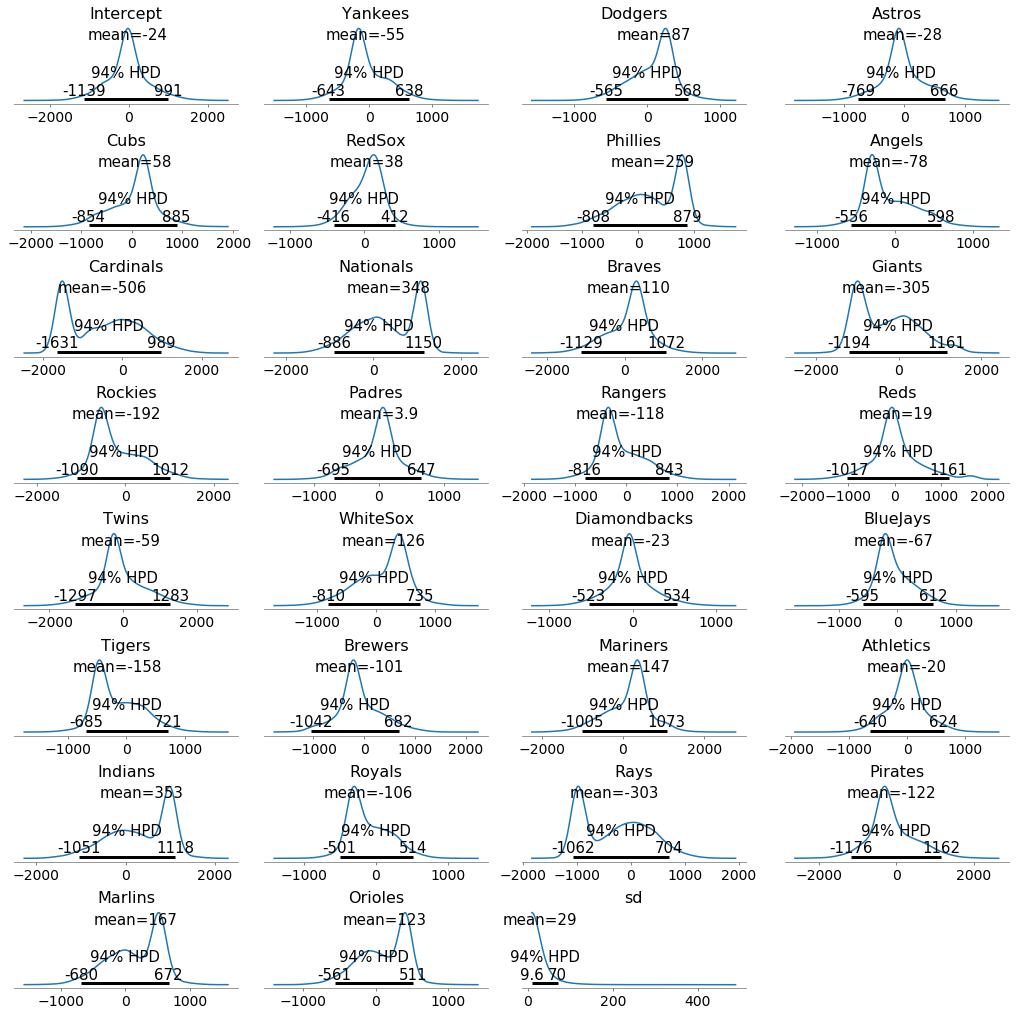

In [363]:
%time
pm.plot_posterior(regression_trace, figsize = (14, 14))

### MCMC Metropolis-Hastings Full League

In [369]:
# Context for the model
with pm.Model() as metropolis:
    
    # The prior for the model parameters will be a normal distribution
    family_metropolis = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = pre_madoff, family = family_metropolis)
    
    # Perform Markov Chain Monte Carlo sampling
    step = pm.Metropolis()
    # step = step
    metropolis_trace = pm.sample(draws=9000, chains = 2, tune = 1000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [Orioles]
>Metropolis: [Marlins]
>Metropolis: [Pirates]
>Metropolis: [Rays]
>Metropolis: [Royals]
>Metropolis: [Indians]
>Metropolis: [Athletics]
>Metropolis: [Mariners]
>Metropolis: [Brewers]
>Metropolis: [Tigers]
>Metropolis: [BlueJays]
>Metropolis: [Diamondbacks]
>Metropolis: [WhiteSox]
>Metropolis: [Twins]
>Metropolis: [Reds]
>Metropolis: [Rangers]
>Metropolis: [Padres]
>Metropolis: [Rockies]
>Metropolis: [Giants]
>Metropolis: [Braves]
>Metropolis: [Nationals]
>Metropolis: [Cardinals]
>Metropolis: [Angels]
>Metropolis: [Phillies]
>Metropolis: [RedSox]
>Metropolis: [Cubs]
>Metropolis: [Astros]
>Metropolis: [Dodgers]
>Metropolis: [Yankees]
>Metropolis: [Intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 20000/20000 [06:16<00:00, 53.13draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026296639710>,
      dtype=object)

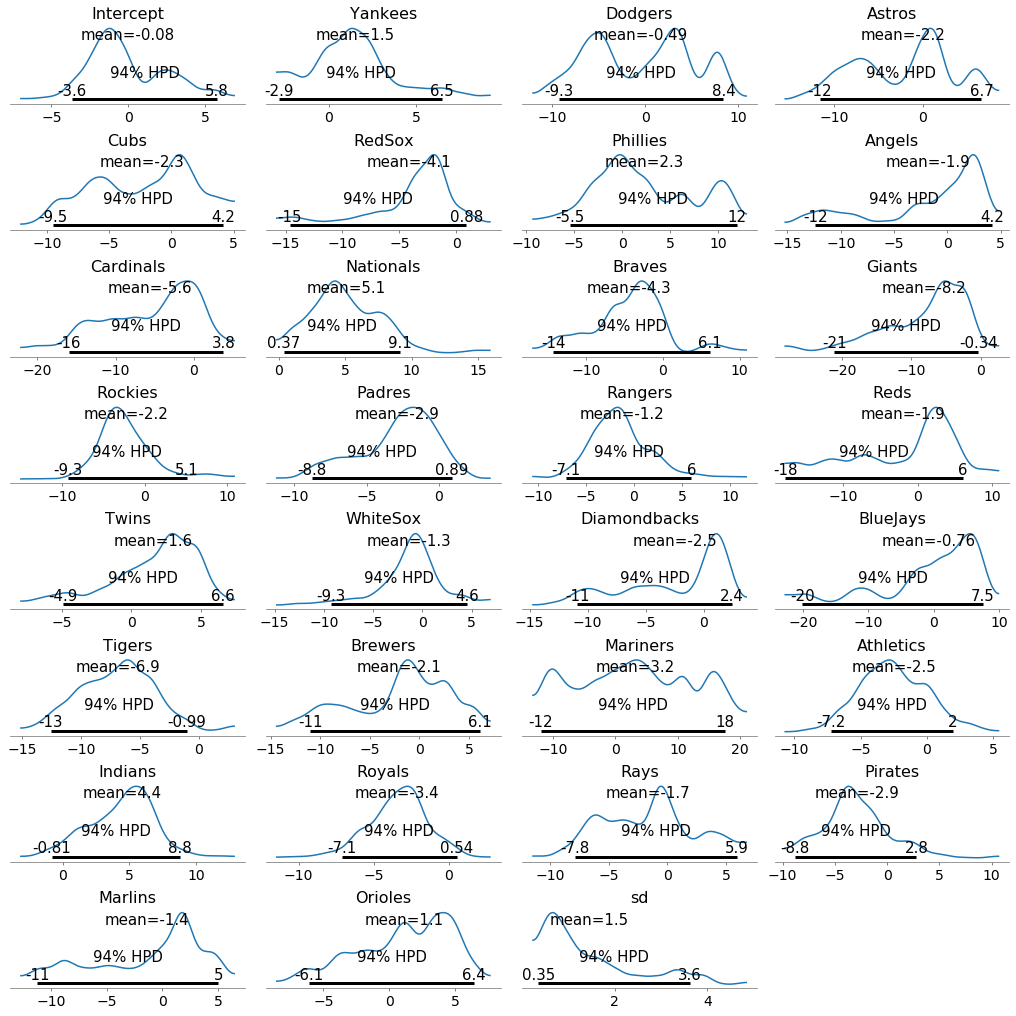

In [370]:
pm.plot_posterior(accept_trace, figsize = (14, 14))

C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied

C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Eric\Anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002628E42F7F0>,
      dtype=object)

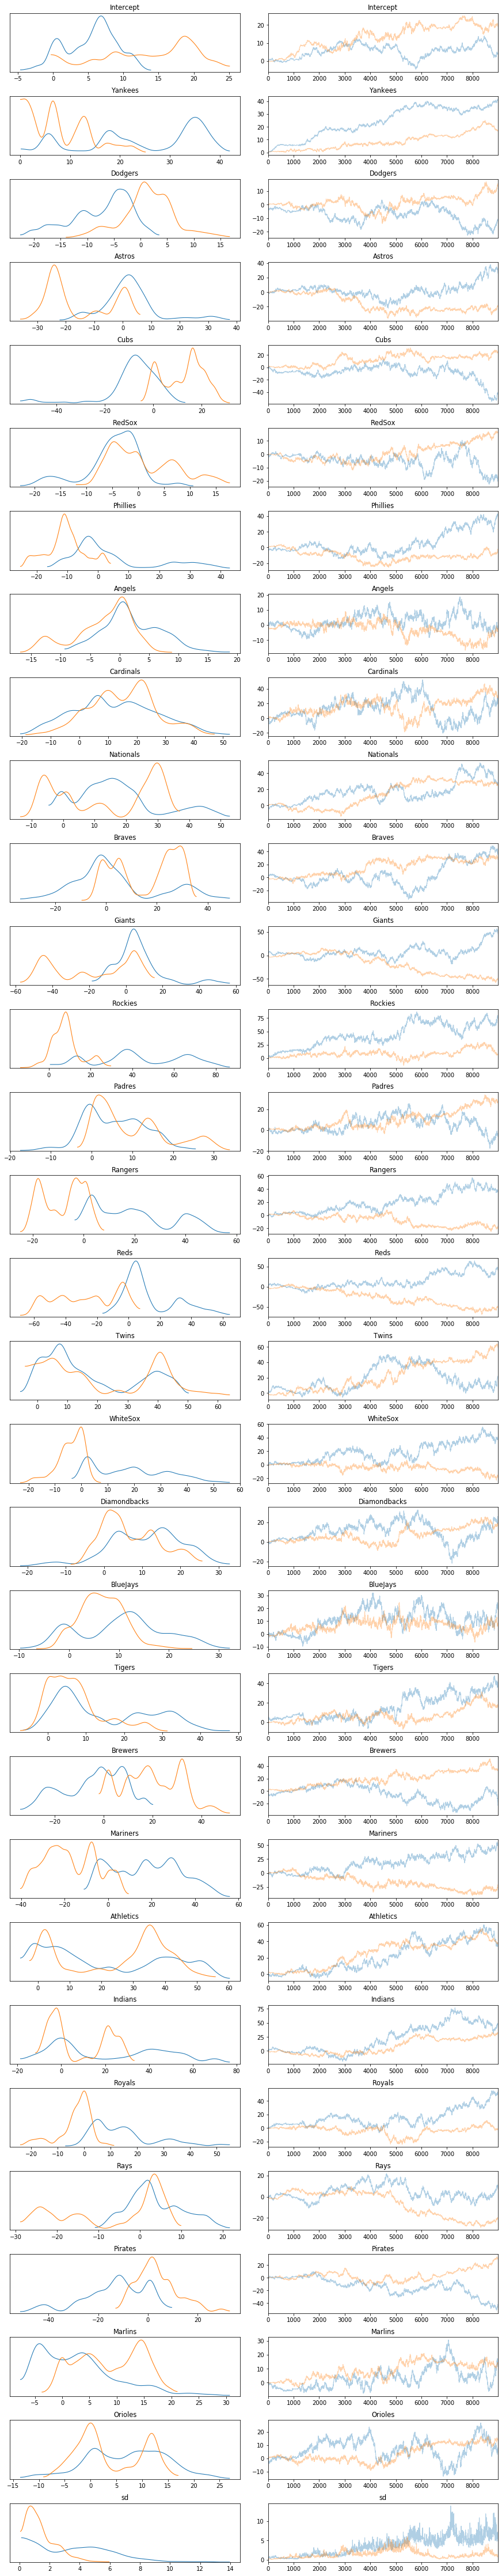

In [371]:
pm.traceplot(metropolis_trace)

### MCMC Linear Regression - NL East

In [494]:
# Big Market Teams
nl_east = ['Nationals', 'Phillies', 'Marlins','Braves']
#big = pre_madoff.drop(columns=["Mets"]).columns
pre_madoff = league.loc[1998:2008]
formula_nl_east = 'Mets ~ ' + ' + '.join(['%s' % variable for variable in nl_east])
nl_east.append('Mets')
formula_nl_east

'Mets ~ Nationals + Phillies + Marlins + Braves'

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [Braves]
>Metropolis: [Marlins]
>Metropolis: [Phillies]
>Metropolis: [Nationals]
>Metropolis: [Intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 42000/42000 [01:07<00:00, 624.80draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


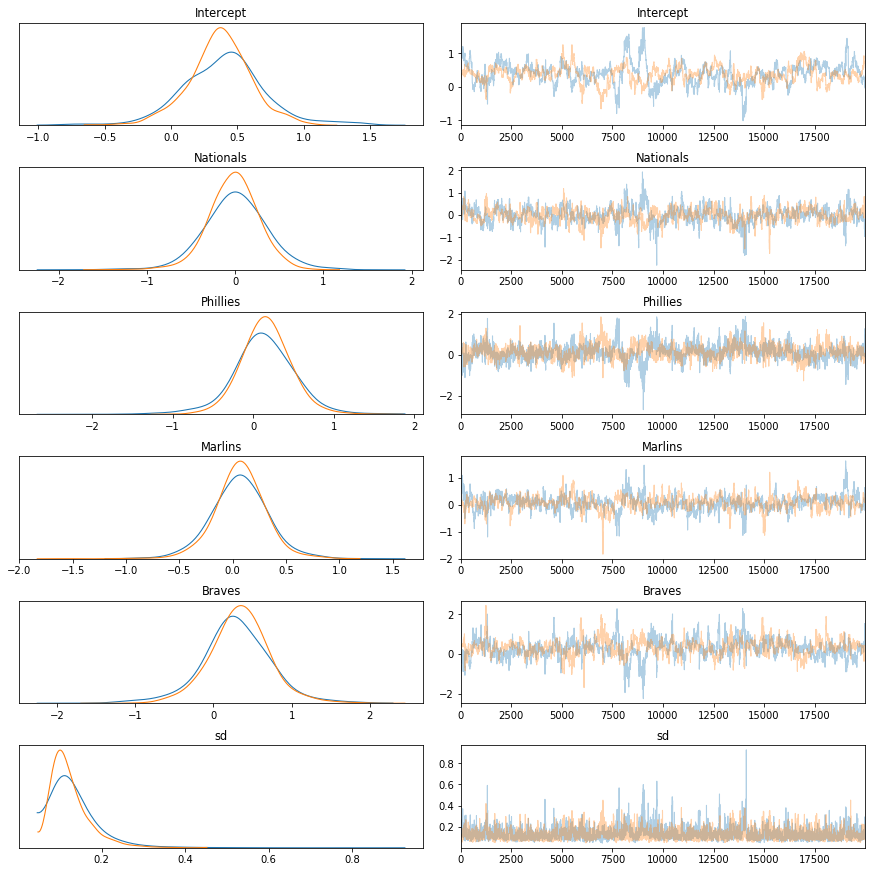

In [495]:
import warnings
warnings.filterwarnings('ignore')

# Context for the model
with pm.Model() as nl_east:
    
    # The prior for the model parameters will be a normal distribution
    family_nl_east = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula_nl_east, data = pre_madoff, family = family_nl_east)
    
    # Perform Markov Chain Monte Carlo sampling
    step = pm.Metropolis()
    # step = step
    nl_east_trace = pm.sample(draws=20000, chains = 2, tune = 1000, step=step)

pm.traceplot(nl_east_trace);

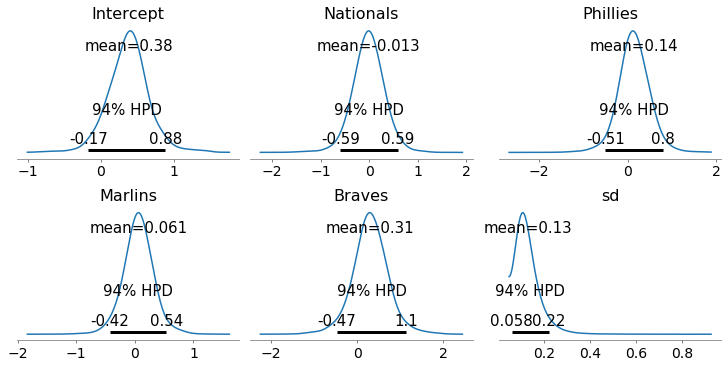

In [500]:
pm.plot_posterior(nl_east_trace, figsize = (10, 5));

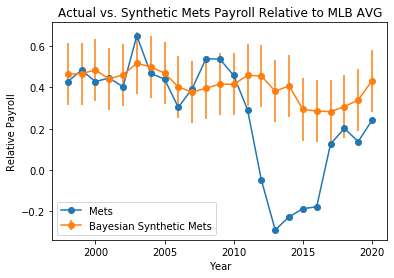

In [532]:
coef = dict.fromkeys(league.columns, 0)
coef = {**coef,**{k: v['mean'] for k, v in pm.summary(nl_east_trace).iterrows()}}


temp_league=league
temp_league['bayesian_mets'] = coef['Intercept']  

for key in coef.keys():
    if (key != 'Intercept') & (key!= 'sd'):
        temp_league['bayesian_mets'] += coef[key]*temp_league[key] 
        
plt.plot(Mets.Year,Mets.RelativePayroll,marker='o', label='Mets')
#plt.plot(temp_league.bayesian_mets,marker='o', label='Bayesian Synthetic Mets')
plt.errorbar(temp_league.index,temp_league.bayesian_mets,yerr=2.353/2*coef['sd'],marker='o', label='Bayesian Synthetic Mets')

#Confident Interval
#plt.plot(temp_league.bayesian_mets+coef['sd']*1.90/2, color='black')
#plt.plot(temp_league.bayesian_mets-coef['sd']*1.90/2, color='black')
plt.title("Actual vs. Synthetic Mets Payroll Relative to MLB AVG")
plt.xlabel('Year')
plt.ylabel('Relative Payroll')
plt.legend(loc='lower left')
plt.show()

### MCMC Bayesian Synthetic Control - Horseshoe Priors (Not finished)

In [442]:
pre_madoff

,Yankees,Dodgers,Astros,Cubs,RedSox,Phillies,Angels,Mets,Cardinals,Nationals,...,Tigers,Brewers,Mariners,Athletics,Indians,Royals,Rays,Pirates,Marlins,Orioles
Year,,,,,,,,,,,,,,,,,,,,,
1998,0.598441,0.528892,0.175856,0.212663,0.448326,-0.303247,0.177925,0.427967,0.073296,-0.797541,...,-0.531705,-0.223515,0.063737,-0.453175,0.449449,-0.133152,-0.333737,-0.666625,-0.631425,0.749299
1999,0.829671,0.475589,0.127486,0.150403,0.488229,-0.365738,0.034720,0.483694,-0.041948,-0.659445,...,-0.274618,-0.109295,-0.078816,-0.498384,0.520462,-0.656457,-0.210963,-0.498543,-0.685651,0.498051
2000,0.662415,0.583120,-0.078610,0.087566,0.400169,-0.150130,-0.075466,0.428363,0.103996,-0.374690,...,0.046712,-0.344195,0.058386,-0.425647,0.363171,-0.579035,0.127552,-0.480313,-0.639414,0.463173
2001,0.703256,0.690675,-0.063254,-0.006891,0.699641,-0.353643,-0.277565,0.445461,0.198741,-0.460526,...,-0.226944,-0.331534,0.173635,-0.475477,0.426853,-0.447053,-0.147509,-0.182465,-0.449206,0.123585
2002,0.867115,0.406334,-0.059265,0.122251,0.606719,-0.140714,-0.084867,0.403111,0.098638,-0.426641,...,-0.183816,-0.254394,0.190333,-0.411677,0.169973,-0.299331,-0.490255,-0.372478,-0.377573,-0.103077
2003,1.150534,0.490559,0.000158,0.124450,0.407127,-0.003503,0.112671,0.649703,0.175392,-0.268627,...,-0.307774,-0.428021,0.224281,-0.292388,-0.315984,-0.429555,-0.723633,-0.228307,-0.309435,0.040107
2004,1.667282,0.308499,0.089264,0.329030,0.826595,0.359921,0.474666,0.468023,0.103374,-0.369817,...,-0.323775,-0.598549,0.189596,-0.127245,-0.495688,-0.305460,-0.569544,-0.529845,-0.385564,-0.252888
2005,1.830838,0.113835,0.055408,0.198805,0.667559,0.310519,0.306119,0.440175,0.282778,-0.332197,...,-0.051548,-0.446930,0.180556,-0.232019,-0.424998,-0.493032,-0.589082,-0.475753,-0.170070,0.025050
2006,1.509939,0.269355,0.193337,0.217487,0.548538,0.138175,0.334143,0.303365,0.146144,-0.185849,...,0.065191,-0.257728,0.134133,-0.197453,-0.277543,-0.390202,-0.543329,-0.397632,-0.806613,-0.064099


In [297]:
#model error
sigma_sq = np.var(synthetic_mets_pre-Mets_pre_payroll[::-1])
sigma_sq

0.00522996531169513

In [296]:
import pymc3 as pm

# Horseshoe Priors
with pm.Model() as model:
    tau = pm.HalfCauchy('tau',sigma_sq**(1/2)) 
    lambda_ = pm.HalfCauchy('lambda', tau, shape=29)
    beta = pm.Normal('beta',mu=0, sigma = lambda_, shape = 29)
    
    likelihood = pm.Normal('mets', mu=Y.dot(beta), sigma=sigma_sq**(1/2), observed=Mets_pre_payroll[::-1])
    
sythetic_mets = Y.dot(beta)

ValueError: setting an array element with a sequence.

In [287]:
print('Test value for tau', tau.tag.test_value)
print('Test value for lambda_', lambda_.tag.test_value)
print('Test value for beta', beta.tag.test_value)

Test value for tau 0.07231849909736189
Test value for lambda_ [[0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185
  0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185
  0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185
  0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185 0.0723185
  0.0723185]]
Test value for beta [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
